# Visualizando con Python

Un aspecto muy importante a la hora de procesar datos, sobre todo de cara a hacerlos entendibles, es una adecuada visualización de los mismos.

Por tanto, R y Python posee muchas librerías y herramientas para visualizar todo tipo de datos. En particular R es muy popular por su excelente librería **ggplot**.

Python posee varias excelentes librerías, no hay una clara ganadora, veremos algunas:

- **[Matplotlib](https://matplotlib.org/):** Librería más utilizada, muchas opciones, permite detallar mucho lo que se desea, pero tiene dos inconvenientes. 
   - Es laboriosa de usar.
   - Estilo un poco feo (herencia de Matlab) aunque se puede personalizar.
- **[Seaborn](https://seaborn.pydata.org/):** Librería construida sobre Matplotlib que presenta dos ventajas:
   - Estilo algo más bonito.
   - Tipos de gráficas más sencillas (boxplot), y además otros más avanzados (FaceGrid, ...).
   - Para ciertos detalles, es necesario conocer también Matplotlib.
- **[Desde Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html):** Permite visualizar rápidamente información de sus atributos.
   - Feo pero rápido.
- **[Altair](https://altair-viz.github.io/):** Enfoque más declarativo, para web (o Notebook).

## Visualizando desde Matplotlib

In [41]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
from matplotlib import pyplot as plt

In [43]:
import numpy as np

Con  subplots() se pueden crear distintas figuras

Se "pinta" realmente en el campo ax, se pueden tener varias subfiguras.

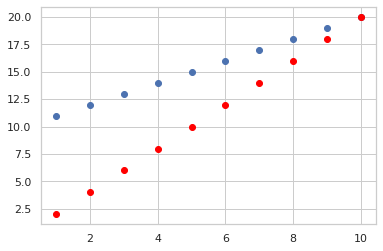

In [44]:
fig, ax = plt.subplots()
x = np.arange(1,11)
ax.scatter(x, x+10, marker='o')
ax.scatter(x, x*2, color='red')

## Añadiendo una leyenda

Parece bien, pero lo suyo sería una leyenda, ¿no? Para distinguir cada una. Se puede hacer usando el campo label.

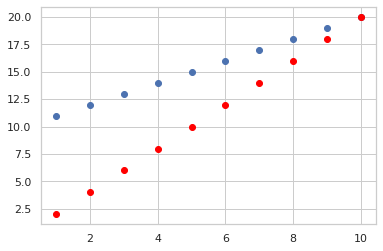

In [45]:
fig, ax = plt.subplots()
ax.scatter(x, x+10, marker='o', label='Lineal')
ax.scatter(x, x*2, color='red', label='Cuadrático')

Falta activarlo

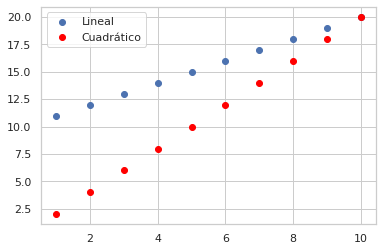

In [46]:
ax.legend()
fig

Podemos mover la leyenda:

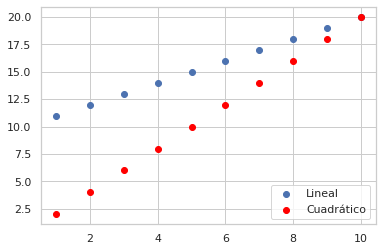

In [47]:
ax.legend(loc='lower right')
fig

## Creamos varias figuras

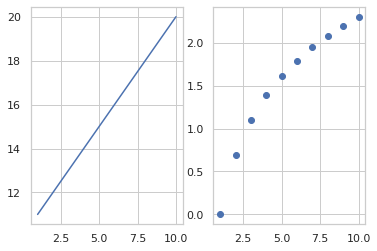

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, x+10)
ax2.scatter(x, np.log(x))

In [49]:
ax1.set_title("Figura 1")
ax2.set_title("Figura 2")

Text(0.5, 1.0, 'Figura 2')

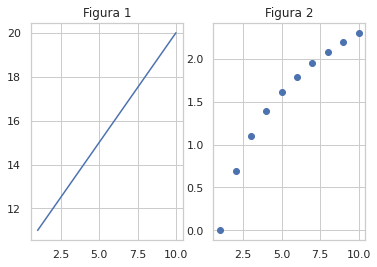

In [50]:
fig

O de forma vertical

<BarContainer object of 2 artists>

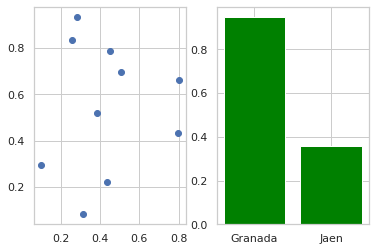

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(np.random.rand(10), np.random.rand(10))
ax2.bar(["Granada", "Jaen"], np.random.rand(2), color='green')

# Seaborn

No es diferente de programar en Matplotlib, pero tiene cosas interesantes.

In [52]:
import seaborn as sns

In [53]:
sns.set_theme()

In [54]:
def example_plots():
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.scatter(np.random.rand(10), np.random.rand(10))
    ax2.bar(["Granada", "Jaen"], np.random.rand(2), color='green')

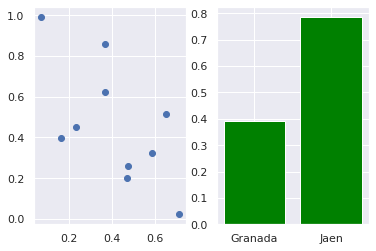

In [55]:
example_plots()

## Cambiando estilo

Se pueden probar otros themas.

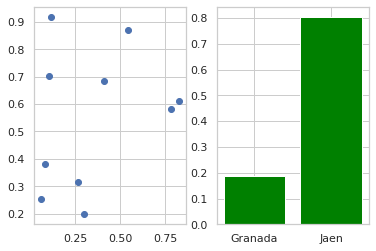

In [56]:
sns.set_style('whitegrid')
example_plots()

Se pueden [configurar más estilos](https://seaborn.pydata.org/tutorial/aesthetics.html).

## Tipos de Gráficas

Pero lo bueno de seaborn son sus [propios tipos de gráficas](http://seaborn.pydata.org/tutorial.html).

In [57]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


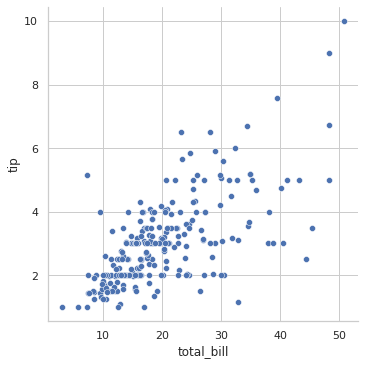

In [58]:
sns.relplot(x="total_bill", y="tip", data=tips);

Se ve que se pasa como data el DataFrame, y luego se puede indicar para cada dimensión el atributo del DataFrame (sólo se tienen en cuenta los usados).

## Identificando por objetivo

¿y si se quiere ver cuáles son fumadores? Habría dos opciones.

- Usando campo hue, que indica el atributo para distinguirlo, los datos de cada tipo tendrán un color, y se marcarán en la leyenda.

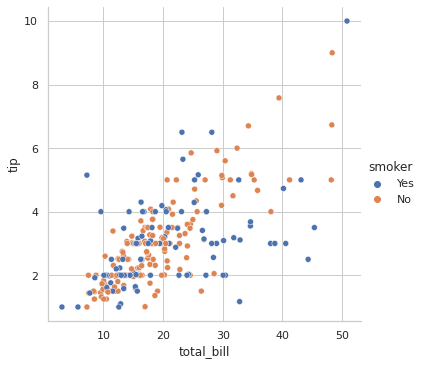

In [59]:
sns.relplot(x="total_bill", y="tip", data=tips, hue="smoker")

Recientemente permite un campo col.

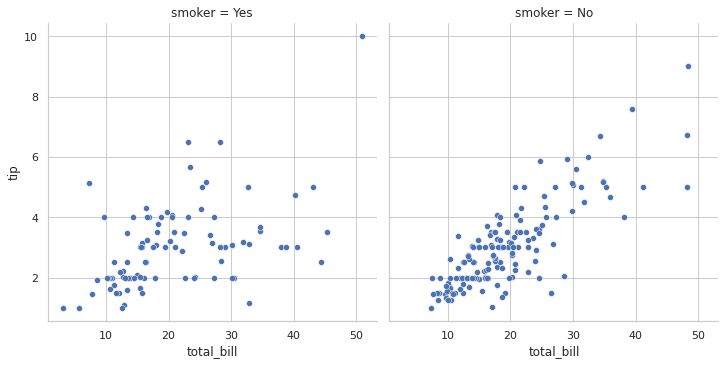

In [60]:
sns.relplot(x="total_bill", y="tip", data=tips, col="smoker")

- Usando un FacetGrid que permite discriminar en función de un tipo por columna o fila, y luego con map pintar cada uno de ellos.

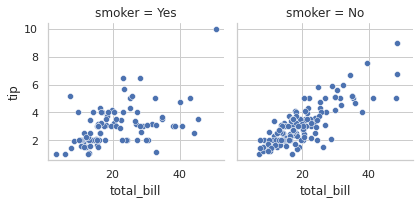

In [61]:
g = sns.FacetGrid(data=tips, col="smoker")
g.map(sns.scatterplot, "total_bill", "tip")

Ahora veremos algunos tipos de gráficas muy útiles.

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

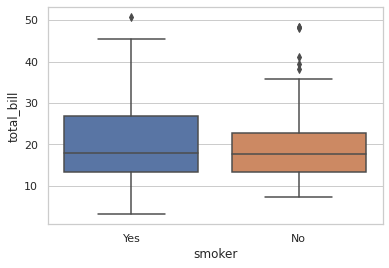

In [62]:
sns.boxplot(data=tips, y='total_bill', x='smoker')

<AxesSubplot:xlabel='smoker', ylabel='count'>

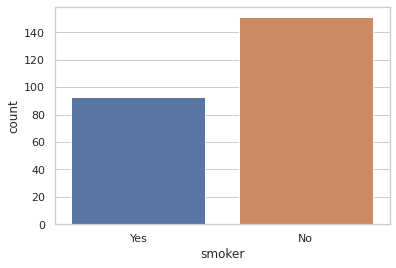

In [63]:
sns.countplot(data=tips, x='smoker')

Es muy potente:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

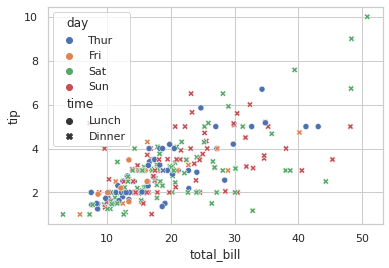

In [64]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

Algo más grande:

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

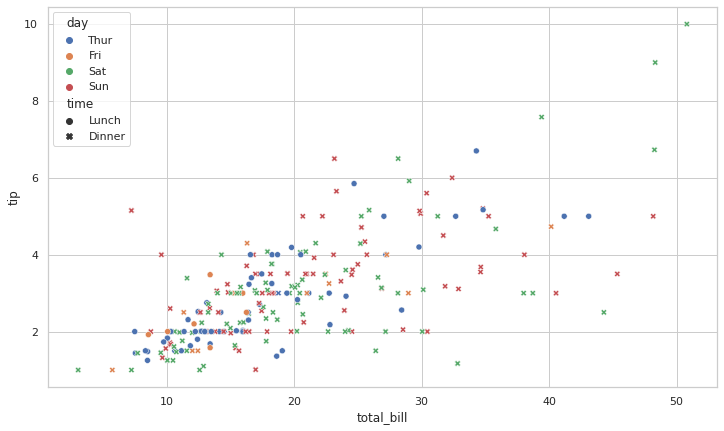

In [65]:
fig2, ax2 = plt.subplots(figsize=(12,7))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time", ax=ax2)

Para manejar varios:

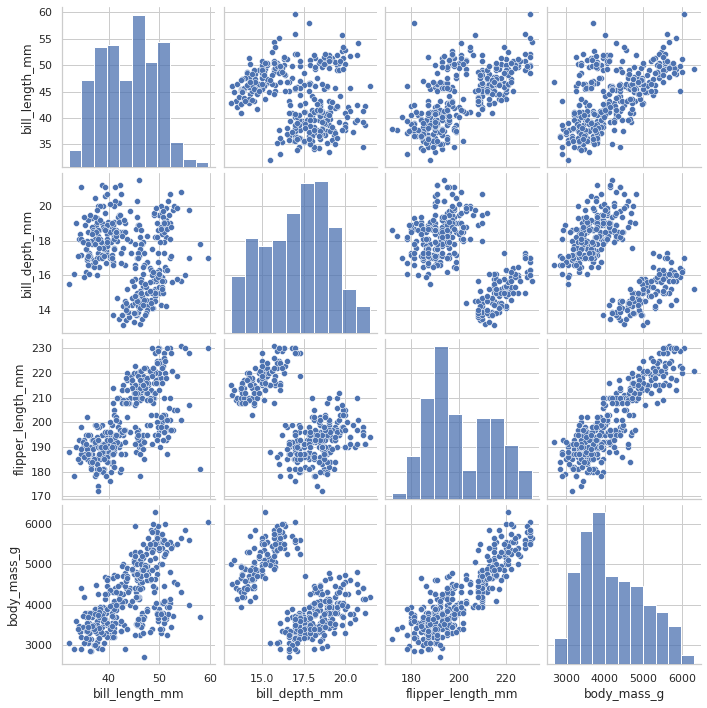

In [66]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

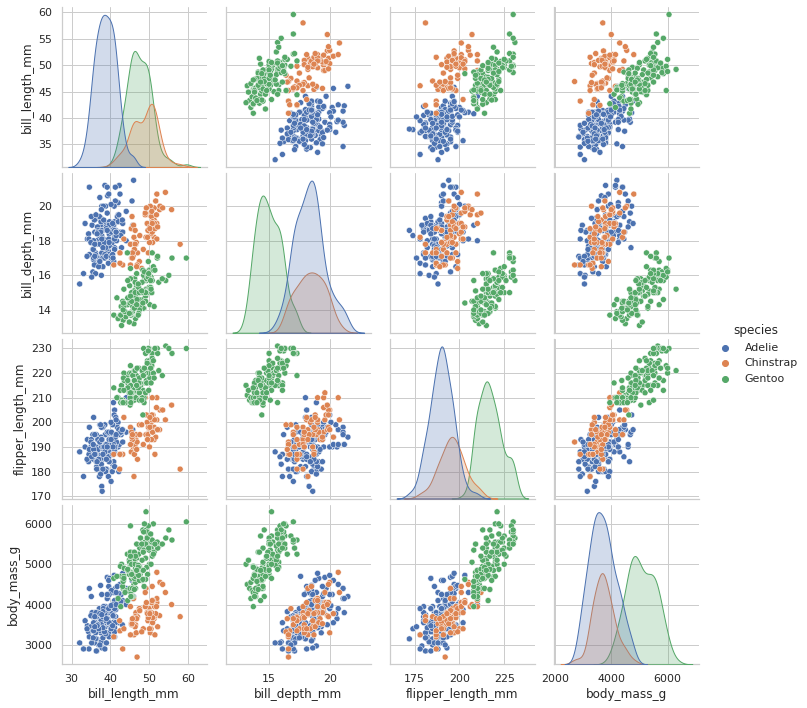

In [67]:
sns.pairplot(penguins, hue="species")

# Ejemplo: Scikit-learn

In [68]:
from sklearn import datasets, metrics, model_selection, svm, tree
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

In [69]:
X

array([[-0.03926799,  0.13191176, -0.21120598, ...,  1.97698901,
         1.02122474, -0.46931074],
       [ 0.77416061,  0.10490717, -0.33281176, ...,  1.2678044 ,
         0.62251914, -1.49026539],
       [-0.0148577 ,  0.67057045, -0.21416666, ..., -0.10486202,
        -0.10169727, -0.45130304],
       ...,
       [ 0.29673317, -0.49610233, -0.86404499, ..., -1.10453952,
         2.01406015,  0.69042902],
       [ 0.08617684,  0.9836362 ,  0.17124355, ...,  2.11564734,
         0.11273794,  1.20985013],
       [-1.58249448, -1.42279491, -0.56430103, ...,  1.26661394,
        -1.31771734,  1.61805427]])

In [70]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

Vamos a visualizar una curva ROC

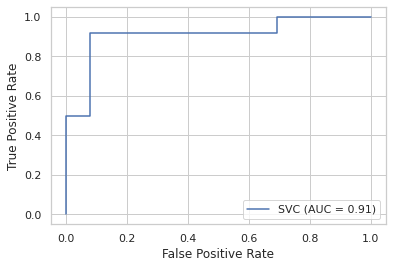

In [71]:
svc = svm.SVC(random_state=0)
svc.fit(X_train, y_train)
metrics.plot_roc_curve(svc, X_test, y_test)  # doctest: +SKIP
plt.show()                                   # doctest: +SKIP

Para añadir otros algoritmos es igual, solo hay que indicar que el campo ax es el mismo en todas.

In [72]:
model_tree = tree.DecisionTreeClassifier(max_depth=5)

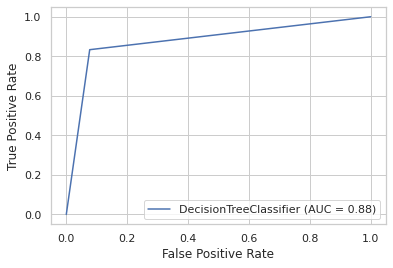

In [73]:
model_tree.fit(X_train, y_train)
plot2 = metrics.plot_roc_curve(model_tree, X_test, y_test)  # doctest: +SKIP
plt.show()                                   # doctest: +SKIP

Si queremos ponerlo en la misma, indicamos el campo ax en el segundo (para reutilizar la figura anterior y no crear una nueva)

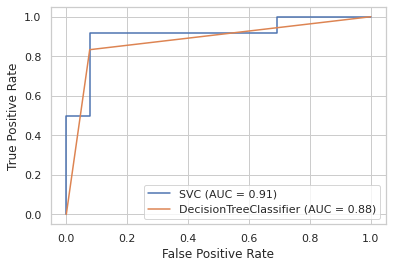

In [74]:
ax = plt.gca()

for model in [svc, model_tree]:
    metrics.plot_roc_curve(model, X_test, y_test, ax=ax)  